## Task 1 objective

To integrate the property data from the json xml files along with the details of hospitals,supermarkets,train stations,shopping centres,suburb,transfer flag and time to CBD. 

First we create the dataframe consisting of the details from the xml file.

Below are the libraries used for the part

In [11]:
from xml.etree import ElementTree
from collections import defaultdict
import json
import math
import pandas as pd
tree = ElementTree.parse('real_state.xml')
root = tree.getroot()

Creating a dict structure where keys are the tags(id,price,address etc) and values are the list of these attribute values

In [12]:
d = defaultdict(list)
for tag1 in root:
    for values in tag1:
        d[tag1.tag].append(values.text) #tag1.tag stores the tag and values.text stores the actual values

Creating a dataframe from the dictionary and repositioning the id as the first column

In [15]:
df = pd.DataFrame(d)
cols1 = list(df)
cols1[0],cols1[9] = cols1[9],cols1[0]  
df = df.loc[:,cols1]   #confirming id as the first column

Reading data from the json file using the json library imported in the first step

In [21]:
f = open('real_state.json')
data = json.load(f)

Using the same dict structure approach from the xml part to create a dataframe object

In [22]:
d1 = defaultdict(list)
for row in data:
    for tags in row:
        d1[tags].append(row[tags])  #

In [23]:
df1 = pd.DataFrame(d1)

In [24]:
df1

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,18460.0,-37.665712,144.928763,21 Tooradin Avenue,3008000.0,house,2016.0,3.0,1.0,1.0
1,42320.0,-37.739847,145.082682,5 Gordon Court,12825000.0,house,2015.0,3.0,2.0,2.0
2,39353.0,-37.699164,145.056625,10 Arthur Street,9265000.0,house,2011.0,3.0,1.0,1.0
3,16895.0,-37.700471,144.920452,25 Churchill Street,4950000.0,house,2010.0,4.0,2.0,2.0
4,27864.0,-37.606075,144.936157,88 Hothlyn Drive,3240000.0,house,2008.0,3.0,2.0,2.0
5,42585.0,-37.751567,145.070736,76 Rosanna Road,9520000.0,house,2010.0,3.0,1.0,1.0
6,88146.0,-37.943366,145.045041,20 William Street,9204000.0,house,2014.0,3.0,2.0,2.0
7,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN
8,91955.0,-37.975603,145.075942,11 Avoca Court,9555000.0,house,2012.0,4.0,2.0,2.0
9,17019.0,-37.709583,144.912346,3/24 Prospect Street,8274000.0,house,2015.0,3.0,2.0,2.0


To check the number of duplicates in the ID column using the set data structure

It is evident that there are 2015-2003 = 12 duplicates(6 ids repeating twice)

In [26]:
prop_ids = []
for i in range(0,len(df)):
    prop_ids.append(df.iloc[i,0])

for i1 in range(0,len(df1)):
    prop_ids.append(df1.iloc[i1,0])
    
print(len(prop_ids))
print(len(set(prop_ids)))

2015
2003


Concatinating the two json and xml files and deleting the rows with nan values

In [27]:
df_combined = pd.concat([df, df1])    #Concatinating the the xml and json dataframes
df_combined.dropna(inplace=True)      #Dropping nan's
df_combined = df_combined.reset_index(drop=True)   # resetting index for smoother operation

C:\Users\HIMANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [31]:
cols2 = list(df_combined)
cols2[0],cols2[7] = cols2[7],cols2[0]
df_combined = df_combined.loc[:,cols2]    #maintaing the id as the first column

In [32]:
#df_combined.dropna(inplace=True)
df_combined.isnull().sum(axis = 0)    # checking if there any nan's remaining

property_id      0
bathrooms        0
bedrooms         0
lat              0
lng              0
parking_space    0
price            0
addr_street      0
property_type    0
year             0
dtype: int64

In [33]:
df_combined = df_combined[df_combined['bedrooms'] != 'nan']   # removing all the string nan's

In [37]:
df_combined.drop_duplicates(keep='first',inplace = True)    # dropping the duplicate entries

In [39]:
df_combined = df_combined.reset_index(drop=True)    # restting the index

In [40]:
df_combined.tail()

,property_id,bathrooms,bedrooms,lat,lng,parking_space,price,addr_street,property_type,year
1992,76058,1,2,-37.9003,145.098,1,4.459e+06,3/126 Atherton Road,house,2009
1993,47247,2,3,-37.703,145.17,2,4.734e+06,49 Milborne Crescent,house,2012
1994,16298,2,3,-37.7087,144.951,1,7.524e+06,104 East Street,house,2015
1995,96546,2,4,-38.0073,145.281,3,5.84e+06,16 Eyebright Square,house,2011
1996,63191,2,4,-37.789,145.261,2,6.305e+06,1 Hermitage Court,house,2009


Using the data from the hospital json file to integrate with our dataset

In [41]:
hos = open('hospitals.json')
hospitals = json.load(hos)
d2 = defaultdict(list)     # using the same defaultdict approach
for row1 in hospitals:
    for tags1 in row1:
        d2[tags1].append(row1[tags1])
df2 = pd.DataFrame(d2)

In [42]:
df2.head() #a look at the hospital dataframe

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


Calculating the hospital id and distance to the closest hospital

The hospital id and distance are stored in the form of a list which will be integrated withour property dataset

In [43]:
hosp_id = []
hosp_dist = []
for prop in range(0,len(df_combined)):   # for every property, calculating the distance
    dist = []
    for hospitals in range(0,len(df2)):    # calculating distance based on cordinates like task 2
        diff_lat = math.radians(float(df_combined.iloc[prop,3])) - math.radians(float(df2.iloc[hospitals,1]))
        diff_lon = math.radians(float(df_combined.iloc[prop,4])) - math.radians(float(df2.iloc[hospitals,2]))
        a_val = (math.sin(diff_lat/2)**2) + (math.cos(math.radians(float(df_combined.iloc[prop,3]))) * math.cos(math.radians(float(df2.iloc[hospitals,1]))) * (math.sin(diff_lon/2)**2))
        c_val = 2 * math.atan2(math.sqrt(a_val),math.sqrt(1 - a_val))
        d = 6378 * c_val
        x = round(d,3)
        dist.append(x)
    hosp_dist.append(min(dist))     # selecting the minimum distance
    min_dist = dist.index(min(dist))   #appending the minimum distance to the list
    hosp_id.append(df2.iloc[min_dist,0])   #appending the hosp_id

In [46]:
df_combined['Hospital_id'] = 1
df_combined['Distance_to_hospital'] = 1
#df_combined.head()

In [47]:
for nrow1 in range(0,len(df_combined)):    #filling the values for our new columns
    df_combined.iloc[nrow1,10] = hosp_id[nrow1]
    df_combined.iloc[nrow1,11] = hosp_dist[nrow1]

In [48]:
df_combined.head()

,property_id,bathrooms,bedrooms,lat,lng,parking_space,price,addr_street,property_type,year,Hospital_id,Distance_to_hospital
0,58954.0,1.0,2.0,-37.812793,145.169612,1.0,5566000.0,4 McMurray Street,house,2011.0,hospital_070,2.153
1,27495.0,1.0,3.0,-37.59127,144.929937,2.0,3708000.0,64 Medway Road,house,2015.0,hospital_104,6.668
2,77042.0,1.0,3.0,-37.937523,145.102701,2.0,8340000.0,1 Tomintoul Court,house,2016.0,hospital_076,2.353
3,59897.0,1.0,3.0,-37.822338,145.204568,2.0,13215000.0,36 Linlithgow Street,house,2014.0,hospital_010,1.612
4,44692.0,2.0,4.0,-37.69702,145.125742,2.0,8928000.0,232 St Helena Road,house,2016.0,hospital_075,1.970


Calculating the shop id and distance to the closest shop

The shop id and distance are stored in the form of a list which will be integrated withour property dataset.

The steps for calculating are similar as the hospital

In [49]:
df_shop = pd.read_excel('shopingcenters.xlsx',sheet_name = 'Sheet1')  # reading data from shop xlsv file

In [50]:
shop_id = []
shop_dist = []
for prop in range(0,len(df_combined)):
    dist = []
    for shops in range(0,len(df_shop)):
        diff_lat = math.radians(float(df_combined.iloc[prop,3])) - math.radians(float(df_shop.iloc[shops,1]))
        diff_lon = math.radians(float(df_combined.iloc[prop,4])) - math.radians(float(df_shop.iloc[shops,2]))
        a_val = (math.sin(diff_lat/2)**2) + (math.cos(math.radians(float(df_combined.iloc[prop,3]))) * math.cos(math.radians(float(df_shop.iloc[shops,1]))) * (math.sin(diff_lon/2)**2))
        c_val = 2 * math.atan2(math.sqrt(a_val),math.sqrt(1 - a_val))
        d = 6378 * c_val
        x = round(d,3)
        dist.append(x)
    shop_dist.append(min(dist))
    min_dist = dist.index(min(dist))
    shop_id.append(df_shop.iloc[min_dist,0])

In [51]:
df_combined['Shopping_center_id'] = 1
df_combined['Distance_to_sc'] = 1

In [52]:
for nrow2 in range(0,len(df_combined)):
    df_combined.iloc[nrow2,12] = shop_id[nrow2]
    df_combined.iloc[nrow2,13] = shop_dist[nrow2]

In [53]:
df_combined.head()

,property_id,bathrooms,bedrooms,lat,lng,parking_space,price,addr_street,property_type,year,Hospital_id,Distance_to_hospital,Shopping_center_id,Distance_to_sc
0,58954.0,1.0,2.0,-37.812793,145.169612,1.0,5566000.0,4 McMurray Street,house,2011.0,hospital_070,2.153,SC_002,0.751
1,27495.0,1.0,3.0,-37.59127,144.929937,2.0,3708000.0,64 Medway Road,house,2015.0,hospital_104,6.668,SC_110,1.164
2,77042.0,1.0,3.0,-37.937523,145.102701,2.0,8340000.0,1 Tomintoul Court,house,2016.0,hospital_076,2.353,SC_003,3.928
3,59897.0,1.0,3.0,-37.822338,145.204568,2.0,13215000.0,36 Linlithgow Street,house,2014.0,hospital_010,1.612,SC_088,2.223
4,44692.0,2.0,4.0,-37.69702,145.125742,2.0,8928000.0,232 St Helena Road,house,2016.0,hospital_075,1.970,SC_051,3.965


Calculating the supermarket id and distance to the closest supermarket

The supermarket id and distance are stored in the form of a list which will be integrated withour property dataset.

The steps for calculating are similar as the hospital and shop part

In [54]:
tables = pd.read_html('supermarkets.html')
df_supermarket = pd.DataFrame(tables[0])
df_supermarket.drop('Unnamed: 0', axis=1,inplace= True)

In [55]:
supermarket_id = []
supermarket_dist = []
for prop in range(0,len(df_combined)):
    dist = []
    for supermarket in range(0,len(df_supermarket)):
        diff_lat = math.radians(float(df_combined.iloc[prop,3])) - math.radians(float(df_supermarket.iloc[supermarket,1]))
        diff_lon = math.radians(float(df_combined.iloc[prop,4])) - math.radians(float(df_supermarket.iloc[supermarket,2]))
        a_val = (math.sin(diff_lat/2)**2) + (math.cos(math.radians(float(df_combined.iloc[prop,3]))) * math.cos(math.radians(float(df_supermarket.iloc[supermarket,1]))) * (math.sin(diff_lon/2)**2))
        c_val = 2 * math.atan2(math.sqrt(a_val),math.sqrt(1 - a_val))
        d = 6378 * c_val
        x = round(d,3)
        dist.append(x)
    supermarket_dist.append(min(dist))
    min_dist = dist.index(min(dist))
    supermarket_id.append(df_supermarket.iloc[min_dist,0])

In [56]:
df_combined['Supermarket_id'] = 1
df_combined['Distance_to_superma'] = 1

In [57]:
for nrow3 in range(0,len(df_combined)):
    df_combined.iloc[nrow3,14] = supermarket_id[nrow3]
    df_combined.iloc[nrow3,15] = supermarket_dist[nrow3]

In [58]:
df_combined.head()

,property_id,bathrooms,bedrooms,lat,lng,parking_space,price,addr_street,property_type,year,Hospital_id,Distance_to_hospital,Shopping_center_id,Distance_to_sc,Supermarket_id,Distance_to_superma
0,58954.0,1.0,2.0,-37.812793,145.169612,1.0,5566000.0,4 McMurray Street,house,2011.0,hospital_070,2.153,SC_002,0.751,S_202,1.367
1,27495.0,1.0,3.0,-37.59127,144.929937,2.0,3708000.0,64 Medway Road,house,2015.0,hospital_104,6.668,SC_110,1.164,S_178,0.470
2,77042.0,1.0,3.0,-37.937523,145.102701,2.0,8340000.0,1 Tomintoul Court,house,2016.0,hospital_076,2.353,SC_003,3.928,S_170,1.715
3,59897.0,1.0,3.0,-37.822338,145.204568,2.0,13215000.0,36 Linlithgow Street,house,2014.0,hospital_010,1.612,SC_088,2.223,S_040,2.421
4,44692.0,2.0,4.0,-37.69702,145.125742,2.0,8928000.0,232 St Helena Road,house,2016.0,hospital_075,1.970,SC_051,3.965,S_051,1.617


In [18]:
#from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt 
import numpy as np  
%matplotlib inline

Calculating the train_station id and distance to the closest train_station

The train_station id and distance are stored in the form of a list which will be integrated withour property dataset.

The steps for calculating are similar as the hospital and shop and supermarket part.

In [60]:
df_stops = pd.read_csv('stops.txt',delimiter = ',')

In [61]:
#df_stops

In [62]:
stop_id = []
stop_dist = []
for prop in range(0,len(df_combined)):
    dist = []
    for stops in range(0,len(df_stops)):
        diff_lat = math.radians(float(df_combined.iloc[prop,3])) - math.radians(float(df_stops.iloc[stops,3]))
        diff_lon = math.radians(float(df_combined.iloc[prop,4])) - math.radians(float(df_stops.iloc[stops,4]))
        a_val = (math.sin(diff_lat/2)**2) + (math.cos(math.radians(float(df_combined.iloc[prop,3]))) * math.cos(math.radians(float(df_stops.iloc[stops,3]))) * (math.sin(diff_lon/2)**2))
        c_val = 2 * math.atan2(math.sqrt(a_val),math.sqrt(1 - a_val))
        d = 6378 * c_val
        x = round(d,3)
        dist.append(x)
    stop_dist.append(min(dist))
    min_dist = dist.index(min(dist))
    stop_id.append(df_stops.iloc[min_dist,0])

In [63]:
df_combined['Train_station_id'] = 1
df_combined['Distance_to_train_sta'] = 1

In [64]:
for nrow4 in range(0,len(df_combined)):
    df_combined.iloc[nrow4,16] = stop_id[nrow4]
    df_combined.iloc[nrow4,17] = stop_dist[nrow4]

In [65]:
df_combined.head()

,property_id,bathrooms,bedrooms,lat,lng,parking_space,price,addr_street,property_type,year,Hospital_id,Distance_to_hospital,Shopping_center_id,Distance_to_sc,Supermarket_id,Distance_to_superma,Train_station_id,Distance_to_train_sta
0,58954.0,1.0,2.0,-37.812793,145.169612,1.0,5566000.0,4 McMurray Street,house,2011.0,hospital_070,2.153,SC_002,0.751,S_202,1.367,19899,0.986
1,27495.0,1.0,3.0,-37.59127,144.929937,2.0,3708000.0,64 Medway Road,house,2015.0,hospital_104,6.668,SC_110,1.164,S_178,0.470,40221,1.665
2,77042.0,1.0,3.0,-37.937523,145.102701,2.0,8340000.0,1 Tomintoul Court,house,2016.0,hospital_076,2.353,SC_003,3.928,S_170,1.715,19915,2.120
3,59897.0,1.0,3.0,-37.822338,145.204568,2.0,13215000.0,36 Linlithgow Street,house,2014.0,hospital_010,1.612,SC_088,2.223,S_040,2.421,19901,0.818
4,44692.0,2.0,4.0,-37.69702,145.125742,2.0,8928000.0,232 St Helena Road,house,2016.0,hospital_075,1.970,SC_051,3.965,S_051,1.617,19985,1.723


Calculating the transfer flag value

My approach involves making a subset of the stop_times dataframe where

1.The departure time is between 7 to 9.

2.The train runs everyday on weekdays.

In [15]:
df_stop_time = pd.read_csv('stop_times.txt',delimiter = ',')  #importing the stop_time dataframe

In [16]:
t1 = []   # stores all row numbers where dep time is between 7-9
for arrtime in range(0,len(df_stop_time)):
    timesplit = df_stop_time.iloc[arrtime,2].split(':')  # spliting the time in hours,mins,secs
    if (timesplit[0] in ['07','08']):    #checking if departure timeis between 7-9
        t1.append(arrtime)

Having a look at the calendar file, its evident only the service id having T0 runs on all the days.

Hence we should capture all the rows with the specific T0 service ids

In [20]:
import re
time79 = df_stop_time.iloc[t1,]
weekday = []    # stores rows of T0 service ids
for servid in range(0,len(time79)):  # designing a re to capture all T0 service ids
    if (re.match(r'[a-zA-Z0-9.-]+T0{1}[a-zA-Z0-9.-]+',time79.iloc[servid,0])):
        weekday.append(servid)

In [24]:
weekday_time79 = df_stop_time.iloc[weekday,]  #selecting the sprcified rows

We are now interested in finding the service ids which passes through finders street and doesn't start at flinders.

As our question demands finding the time to flinders(and not from flinders),its better to neglect ids that originate from flinders street

In [26]:
flinders2 = []
for stoptime2 in range(0,len(weekday_time79)):   # check if if service id has flinders and not originating from it
    if (weekday_time79.iloc[stoptime2,3] == 19854 and int(weekday_time79.iloc[stoptime2,4]) != 1):
        #print(weekday_time79.iloc[stoptime2,])
        flinders2.append(weekday_time79.iloc[stoptime2,0])  #append sevice id

This says that there are 233(non unique) service ids which follow the above criteria.

In [27]:
len(flinders2)

233

Now we have the service id's which we require

Next task is to check if the row's service id is in the our required service id.

In [72]:
q3 = set(flinders2)
required_rows1 = []
for stoptime5 in range(0,len(weekday_time79)):  # check every row's service id
    if (weekday_time79.iloc[stoptime5,0] in q3): # see if it's in our required service id
        required_rows1.append(stoptime5)

In [73]:
#'17068385.T0.2-ALM-F-mjp-1.2.H' in 
weekday_time79_flinders = weekday_time79.iloc[required_rows1,]

Now we have a subset of the stop_times dataframe where every stop id goes directly to flinders street

So we should make a set of all id's which gos directly to flinders'

In [75]:
stops_num = []
for stop_num in range(0,len(weekday_time79_flinders)):  # taking the stop_ids in all the rows
    stops_num.append(weekday_time79_flinders.iloc[stop_num,3])
direct_flinders = set(stops_num)  # making a unique set

In [76]:
df_combined['Transfer_flag'] = 1
for row9 in range(0,len(df_combined)):
    if (df_combined.iloc[row9,16] in direct_flinders):  # if train station id is in the set,it's set to 0
        df_combined.iloc[row9,18] = 0

In [77]:
df_combined.head()
#len(df_combined)

,property_id,bathrooms,bedrooms,lat,lng,parking_space,price,addr_street,property_type,year,Hospital_id,Distance_to_hospital,Shopping_center_id,Distance_to_sc,Supermarket_id,Distance_to_superma,Train_station_id,Distance_to_train_sta,Transfer_flag
0,58954.0,1.0,2.0,-37.812793,145.169612,1.0,5566000.0,4 McMurray Street,house,2011.0,hospital_070,2.153,SC_002,0.751,S_202,1.367,19899,0.986,0
1,27495.0,1.0,3.0,-37.59127,144.929937,2.0,3708000.0,64 Medway Road,house,2015.0,hospital_104,6.668,SC_110,1.164,S_178,0.470,40221,1.665,0
2,77042.0,1.0,3.0,-37.937523,145.102701,2.0,8340000.0,1 Tomintoul Court,house,2016.0,hospital_076,2.353,SC_003,3.928,S_170,1.715,19915,2.120,0
3,59897.0,1.0,3.0,-37.822338,145.204568,2.0,13215000.0,36 Linlithgow Street,house,2014.0,hospital_010,1.612,SC_088,2.223,S_040,2.421,19901,0.818,0
4,44692.0,2.0,4.0,-37.69702,145.125742,2.0,8928000.0,232 St Helena Road,house,2016.0,hospital_075,1.970,SC_051,3.965,S_051,1.617,19985,1.723,0


## Getting the suburb name based on the coordinates.

We will use the shape files to obtain the suburb name

In [31]:
# importing the libraries
import numpy
import matplotlib 
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [79]:
sf = shapefile.Reader("VIC_LOCALITY_POLYGON_shp")  # reading the shapefile

In [80]:
recs = sf.records()
shapes = sf.shapes()

In [81]:
len(shapes)

2973

Just a visualisation of the shapefile data

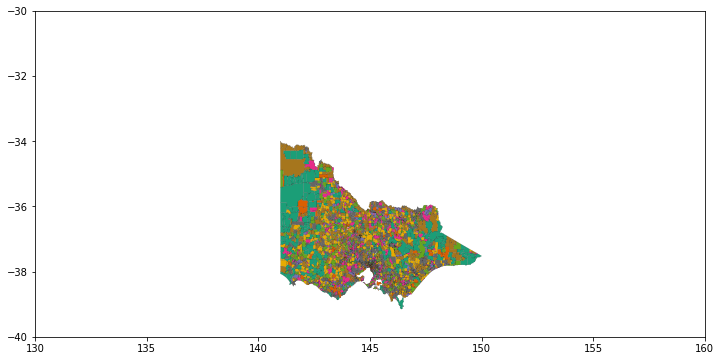

In [83]:
cm = matplotlib.cm.get_cmap('Dark2')

Nshp = len(shapes)
cccol = cm(1.*numpy.arange(Nshp)/Nshp) # one colour for every contry...
# plot
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

#Plot each country
for nshp in range(Nshp): # change range to xrange if you use Python 2
    ptchs   = []
    pts     = numpy.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
        
    for pij in range(len(prt)): # change range to xrange if you use Python 2
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))

ax.set_xlim(+130,+160)
ax.set_ylim(-40,-30)

plt.show()

In [ ]:
Making a list of list structur for the cordinates of all our properties

In [85]:
#df_combined.head()
points = []    # stores the cordinates of all the properties
lat = df_combined.iloc[:,3]
print(len(lat))
lon = df_combined.iloc[:,4]
for numb in range(0,len(lat)):
    q1 = list((lat[numb],lon[numb]))
    points.append(q1)

1997


In [86]:
#points = list(zip(lat,lon))
#float(points[0][0])
import shapefile
from shapely.geometry import shape, Point

# read your shapefile
r = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.shp")

# get the shapes
shapes = r.shapes()
store_index = []   # stores the index number of property suburd

For every coordinate we check if it belong to the given shape boundary.

If yes we store the index

In [87]:
# build a shapely polygon from your shape
for cordinates in range(0,len(points)):  # for every cordinate
    point1 = Point(float(points[cordinates][1]),float(points[cordinates][0]))# lon,lat
    for shape_no in range(0,len(shapes)): # check if its within that polygon
        polygon = shape(shapes[shape_no])    
        if polygon.contains(point1):
            store_index.append(shape_no)
            break
    else:
        store_index.append('not available')

The observation is that every cordinate belongs to a suburb as there were no not available

Now we can match the index we obtained in the previous step with the recs
Example index 597 from records will give us a suburb

In [92]:
store_index   

[597,
 1359,
 331,
 2884,
 2858,
 633,
 555,
 2128,
 555,
 2495,
 2802,
 2640,
 2604,
 728,
 2550,
 1439,
 2728,
 1962,
 438,
 2604,
 771,
 1824,
 2732,
 2758,
 2606,
 2930,
 1392,
 1359,
 1824,
 2640,
 2935,
 1824,
 2858,
 2843,
 2930,
 867,
 1439,
 1394,
 1091,
 2799,
 2843,
 103,
 2756,
 480,
 2799,
 1848,
 30,
 1962,
 2713,
 30,
 508,
 2258,
 438,
 1393,
 1359,
 2805,
 2598,
 1359,
 2550,
 2504,
 358,
 2930,
 2758,
 408,
 2504,
 1691,
 619,
 282,
 634,
 2763,
 2759,
 2884,
 2732,
 2884,
 29,
 723,
 1691,
 2728,
 515,
 564,
 330,
 330,
 2745,
 728,
 515,
 330,
 518,
 1289,
 460,
 1694,
 475,
 518,
 379,
 2258,
 2495,
 2773,
 80,
 1359,
 1359,
 634,
 2802,
 2805,
 890,
 1822,
 30,
 2746,
 2954,
 163,
 438,
 515,
 2128,
 2842,
 305,
 2805,
 2858,
 1691,
 438,
 2858,
 1822,
 1962,
 438,
 330,
 172,
 2842,
 360,
 2883,
 771,
 379,
 2758,
 1038,
 2732,
 358,
 2606,
 2954,
 522,
 1822,
 2954,
 2258,
 425,
 2729,
 1136,
 1824,
 30,
 633,
 771,
 2879,
 480,
 2763,
 358,
 2773,
 2843,
 2732,

In [89]:
suburbs = []    # stores all the suburb names
for subs in range(0,len(recs)):
    suburbs.append(recs[subs][6])

In [90]:
suburbs

['UNDERBOOL',
 'NURRAN',
 'WOORNDOO',
 'DEPTFORD',
 'YANAC',
 'MINIMAY',
 'GLEN FORBES',
 'ADAMS ESTATE',
 'DIMBOOLA',
 'CANNUM',
 'WALLUP',
 'MURRA WARRA',
 'KALKEE',
 'WAIL',
 'PIMPINIO',
 'DOOEN',
 'VECTIS',
 'QUANTONG',
 'CARWARP',
 'OMEO',
 'YAPEEN',
 'LOGAN',
 'TOM GROGGIN',
 'TAMBOON',
 'WONGUNGARRA',
 'WILSONS PROMONTORY',
 'GUILDFORD',
 'WILLAURA',
 'COBBERAS',
 'MACLEOD',
 'BUNDOORA',
 'HEIDELBERG WEST',
 'MONEGEETTA',
 'PERONNE',
 'TUTYE',
 'MOORALLA',
 'DUNKELD',
 'SUGGAN BUGGAN',
 'BAW BAW',
 'CABBAGE TREE CREEK',
 'WAHRING',
 'NAMBROK',
 'KILMANY',
 'DEEPDENE',
 'MURRAYVILLE',
 'EDENHOPE',
 'WARRACKNABEAL',
 'DARTMOOR',
 'DANDONGADALE',
 'GELANTIPY',
 'MANSFIELD',
 'LINGA',
 'BOINKA',
 'TENBY POINT',
 'CORONET BAY',
 'CORINELLA',
 'CROYDON SOUTH',
 'BANKSIA PENINSULA',
 'GEORGES CREEK',
 'COBURG NORTH',
 'PASCOE VALE',
 'KULWIN',
 'WALPEUP',
 'WYCHEPROOF',
 'MARENGO',
 'CAPE OTWAY',
 'MOUNT BULLER',
 'CHETWYND',
 'WATTLE HILL',
 'GELLIBRAND LOWER',
 'PRINCETOWN',
 'PETERB

In [91]:
df_combined['suburb'] = 'not available'

In [93]:
for nrow13 in range(0,len(df_combined)):  # filling the suburbs according to the index
    df_combined.iloc[nrow13,19] = suburbs[store_index[nrow13]]

In [94]:
df_combined.head()

,property_id,bathrooms,bedrooms,lat,lng,parking_space,price,addr_street,property_type,year,Hospital_id,Distance_to_hospital,Shopping_center_id,Distance_to_sc,Supermarket_id,Distance_to_superma,Train_station_id,Distance_to_train_sta,Transfer_flag,suburb
0,58954.0,1.0,2.0,-37.812793,145.169612,1.0,5566000.0,4 McMurray Street,house,2011.0,hospital_070,2.153,SC_002,0.751,S_202,1.367,19899,0.986,0,NUNAWADING
1,27495.0,1.0,3.0,-37.59127,144.929937,2.0,3708000.0,64 Medway Road,house,2015.0,hospital_104,6.668,SC_110,1.164,S_178,0.470,40221,1.665,0,CRAIGIEBURN
2,77042.0,1.0,3.0,-37.937523,145.102701,2.0,8340000.0,1 Tomintoul Court,house,2016.0,hospital_076,2.353,SC_003,3.928,S_170,1.715,19915,2.120,0,CLARINDA
3,59897.0,1.0,3.0,-37.822338,145.204568,2.0,13215000.0,36 Linlithgow Street,house,2014.0,hospital_010,1.612,SC_088,2.223,S_040,2.421,19901,0.818,0,MITCHAM
4,44692.0,2.0,4.0,-37.69702,145.125742,2.0,8928000.0,232 St Helena Road,house,2016.0,hospital_075,1.970,SC_051,3.965,S_051,1.617,19985,1.723,0,GREENSBOROUGH


Calculating the average travel time

The steps involve 

1. check if the transfer flag = 0 (indicating direct train)

2. store all the departure times of all the train leaving from that particular station.

3. store all the respective trip id's of all the train leaving from that particular station.

4. Storing the arrival time at finders of the departed train matching with trip id.

5. Calculating time if arrival time > departure because we are interested in towards flinders journey.

6. Storing the average.

In [129]:
time_to_cbd = []
for row16 in range(0,len(df_combined)):
    if df_combined.iloc[row16,18] == 0: # checking if direct train
        trip_id = []
        dep_time = []
        arr_time_flin = []
        for i in range(0,len(weekday_time79_flinders)):   # finding all departure times from the dataframe used in transfer flag part
            if weekday_time79_flinders.iloc[i,3] == df_combined.iloc[row16,16]:
                trip_id.append(weekday_time79_flinders.iloc[i,0])
                dep_time.append(weekday_time79_flinders.iloc[i,2])  # storing all ids which would be used later
        
        for i2 in range(0,len(trip_id)):
            for i1 in range(0,len(weekday_time79_flinders)):  # finding arrival time at flinders of the departed traind
                if (weekday_time79_flinders.iloc[i1,0] == trip_id[i2] and weekday_time79_flinders.iloc[i1,3] == 19854): # matching with trip id and flinder's station id
                    arr_time_flin.append(weekday_time79_flinders.iloc[i1,1])
            
        t = []
        if len(dep_time) == len(arr_time_flin):
            for i3 in range(0,len(dep_time)):
                if arr_time_flin[i3] > dep_time[i3]:   # if arrival time > dep time indicating towards flinders journey
                    time_dep = dep_time[i3].split(':')
                    time_arr = arr_time_flin[i3].split(':')
                    time = (((int(time_arr[0]) - int(time_dep[0])) * 60) + ((int(time_arr[1]) - int(time_dep[1])) * 1))
                    t.append(time)
        #print(t)
            time_to_cbd.append(sum(t)/len(t))  # taking average of the time
        else:
            print(row16,len(dep_time),len(arr_time_flin))
            time_to_cbd.append(0)
    else:
        time_to_cbd.append(0)  # if transfer fla is 1 travel time is zero

In [132]:
df_combined['travel_min_to_CBD'] = 0
for row20 in range(0,len(time_to_cbd)):  #filling the averaage travel time calculated in the previous step
    df_combined.iloc[row20,20] = time_to_cbd[row20]
#print(sum(t)/len(t))

## Task 2

The task comprises of generating different transformation techniques on the price column as observing the distribution as well their effect on alinear model 

In [13]:
import pandas as pd
df_combined = pd.read_csv('29389089_solution.csv')  # importing output file from task 1

Importing the sklearn library for linear regression analysis

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df_combined[['bedrooms','bathrooms','parking_space']]  # predictors used, not using property type as it has the same value i.e house

Running the linear model on price without any normalisation or transformation

In [17]:
y = df_combined['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

31319472439879.566

Generating different transformation results on min-max normalization

In [18]:
#min max transformation
Vmin=pd.to_numeric(df_combined['price']).min()
Vmax=pd.to_numeric(df_combined['price']).max()
df_combined['MinMaxPrice']=(pd.to_numeric(df_combined['price'])-Vmin)/(Vmax-Vmin)
import numpy as np
#log transformation
#df_combined['LogPrice_minmax']=np.log(pd.to_numeric(df_combined['MinMaxPrice']))
#square root transformation
df_combined['sqrtPrice_minmax']=np.sqrt(pd.to_numeric(df_combined['MinMaxPrice']))
#power transformation
df_combined['PowPrice_minmax']=np.power(pd.to_numeric(df_combined['MinMaxPrice']),2)

Running linear regression model where y is sqrt of price after min-max

In [19]:
y = df_combined['sqrtPrice_minmax']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.018226179297974127

Running linear regression model where y is power of price after min-max

In [20]:
y = df_combined['PowPrice_minmax']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.005858106179757913

In [24]:
#z score calculation
zscore_price = (df_combined['price'] - df_combined['price'].mean())/df_combined['price'].std()

In [26]:
#power transformation on z score
df_combined['PowPrice_zscore']=np.power(pd.to_numeric(zscore_price),2)

In [27]:
y = df_combined['PowPrice_zscore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

5.588476962343961

In [29]:
#log transformation on just the price
df_combined['LogPrice']=np.log(pd.to_numeric(df_combined['price']))
y = df_combined['LogPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.30760124009619355

Plotting the data of price after the transformations

(array([562., 789., 380., 126.,  92.,  28.,   9.,   6.,   2.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

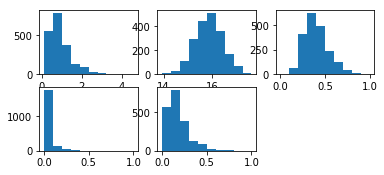

In [32]:
plt.subplot(3, 3, 1)
plt.hist(df_combined['price'])
plt.subplot(3, 3, 2)
plt.hist(df_combined['LogPrice'])
plt.subplot(3, 3, 3)
plt.hist(df_combined['sqrtPrice_minmax'])
plt.subplot(3, 3, 4)
plt.hist(df_combined['PowPrice_minmax'])
plt.subplot(3, 3, 5)
plt.hist(df_combined['MinMaxPrice'])

## Observations

1. Price,powerprice of Min-Max and Minmax price are right skewed,the logPrice(1st row,2nd column)somewhat represents a normal distribution and the squareroot transformation of min-max price represent a left skewed graph.

2. In terms of MSE on a linear regression model where price is predicted,power transformation of the min-max normalization of price gives the lowest MSE of 0.00585 would give the lowest MSE.

One of the reasons for a low MSE is all the values after min max are in the range of 0 to 1.
After power transformation their values are further reduced.
Example - 0.8^2 = 0.64
That means all the data points are more concentrated and hence their errors would be more concentrated(close to the line) which would result in a lower MSE.

3. The second lowest MSE is given by sqrt transformation after minmax of price.The result is expected because square root of a number between 0 and 1 actually increases the value.
Example - sqrt(0.5) = 0.707
Hence the data points are more spread within the range of 0 to 1

4. Log-transformation shrinks to distribution and hence the distance of the points gets significantly reduced and hence generates a low MSE score.

5. I haven't used log transformation for min-max or z score as log of 0 or negative values are not defined

Dropping all the unnecessary columns 

In [37]:
df_combined.drop(['MinMaxPrice','sqrtPrice_minmax','PowPrice_minmax','PowPrice_zscore','LogPrice'],axis = 1,inplace = True)

Rearranging the columns according to the given specification in the pdf

In [39]:
cols1 = list(df_combined)
cols1[1],cols1[3] = cols1[3],cols1[1]  
df_combined = df_combined.loc[:,cols1]   
cols1[2],cols1[4] = cols1[4],cols1[2]  
df_combined = df_combined.loc[:,cols1]
cols1[3],cols1[7] = cols1[7],cols1[3]  
df_combined = df_combined.loc[:,cols1]   
cols1[4],cols1[19] = cols1[19],cols1[4]  
df_combined = df_combined.loc[:,cols1] 
cols1[5],cols1[6] = cols1[6],cols1[5]  
df_combined = df_combined.loc[:,cols1]   
cols1[6],cols1[8] = cols1[8],cols1[6]  
df_combined = df_combined.loc[:,cols1] 
cols1[7],cols1[9] = cols1[9],cols1[7]  
df_combined = df_combined.loc[:,cols1] 
cols1[8],cols1[19] = cols1[19],cols1[8]  
df_combined = df_combined.loc[:,cols1] 
cols1[10],cols1[19] = cols1[19],cols1[10]  
df_combined = df_combined.loc[:,cols1] 
cols1[11],cols1[12] = cols1[12],cols1[11]  
df_combined = df_combined.loc[:,cols1] 
cols1[12],cols1[13] = cols1[13],cols1[12]  
df_combined = df_combined.loc[:,cols1] 
cols1[13],cols1[16] = cols1[16],cols1[13]  
df_combined = df_combined.loc[:,cols1] 
cols1[14],cols1[17] = cols1[17],cols1[14]  
df_combined = df_combined.loc[:,cols1] 
cols1[15],cols1[20] = cols1[20],cols1[15]  
df_combined = df_combined.loc[:,cols1] 
cols1[16],cols1[18] = cols1[18],cols1[16]  
df_combined = df_combined.loc[:,cols1] 

In [56]:
cols1[17],cols1[19] = cols1[19],cols1[17]  
df_combined = df_combined.loc[:,cols1] 

In [58]:
df_combined.to_csv('29389089_solution.csv',index= False)